In [19]:
import mglearn
import pandas as pd
import numpy as np

In [2]:
#!pip install mglearn


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Feature importances: [0. 1.]


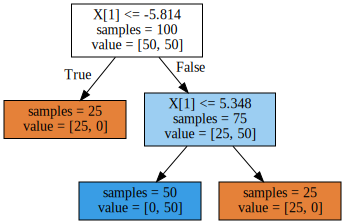

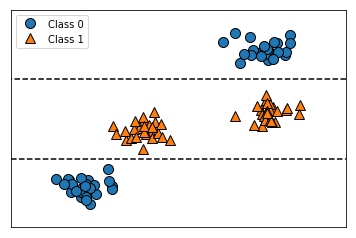

In [4]:
mglearn.plots.plot_tree_not_monotone()

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [8]:
cancer = load_breast_cancer()



In [9]:
train_test_split?

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target,stratify=cancer.target,random_state=42)

In [12]:
tree = DecisionTreeClassifier(random_state=0)

In [13]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [14]:
print('Accuracy on the training subset: {: 3f}'.format(tree.score(X_train,y_train)))

print('Accuracy on the test subset: {: 3f}'.format(tree.score(X_test,y_test)))

Accuracy on the training subset:  1.000000
Accuracy on the test subset:  0.937063


In [20]:
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [30]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# prooning
- pre 
- post

In [23]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print('Accuracy on the training subset: {: 3f}'.format(tree.score(X_train,y_train)))

print('Accuracy on the test subset: {: 3f}'.format(tree.score(X_test,y_test)))

Accuracy on the training subset:  0.988263
Accuracy on the test subset:  0.951049


In [25]:
import graphviz
from sklearn.tree import export_graphviz

In [26]:
export_graphviz(tree, out_file='cancertree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names,
               impurity=False,filled=True)

In [27]:
ls

ASTROSFINAL.csv*                 Astros_viz.ipynb*      mytree.dot*
ASTROSFINALGAMEALL_DUMMY.ipynb*  Astros_WORKINg.ipynb*  plot_func.py*
ASTROSFINALGAMEALL.ipynb*        beat_geojson/          __pycache__/
ASTROSFINALGAME.ipynb*           cache/                 sports_scores/
Astros_reg-Copy2.ipynb*          cancertree.dot*        Untitled1.ipynb*
Astros_reg-Copy3.ipynb*          data/                  Untitled-Copy1.ipynb*
Astros_reg-Copy4.ipynb*          dtree.ipynb*           Untitled.ipynb*
Astros_reg.ipynb*                kmeans.ipynb*


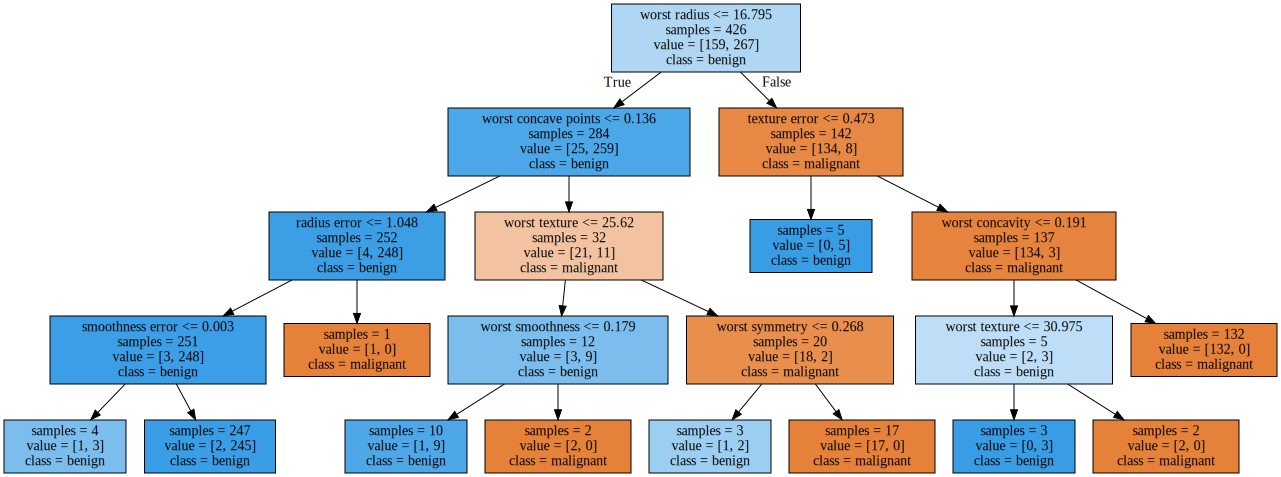

In [28]:
import graphviz

with open("cancertree.dot") as f:
    dot_graph = f.read()

# remove the display(...)

graphviz.Source(dot_graph)